**Progress Report #2 - Regression**

Team Name: Regal Royals

1. Shinhyuk Park
2. Devin Dupree
3. Samnang Pech

This code imports various Python libraries for data analysis, machine learning, and plotting. It then loads an electric vehicle dataset from an online source (Excel file) into a DataFrame called eCar, preparing it for further analysis.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import r_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/Electric_Vehicle_Population_Data.xlsx'
eCar = pd.read_excel(url)

# **Linear Regression**

This section creates a linear regression model using two selected attributes from the eCar dataset. It also uses matplotlib to plot the observed values against the predicted values.

1. Legislative District & Postal code are two attributes that house the population of a state. Reducing the dataframe to a sample of 250 makes the graph easier to read and will show a relation of legislative code to zip code.

Text(0, 0.5, 'Zip Code')

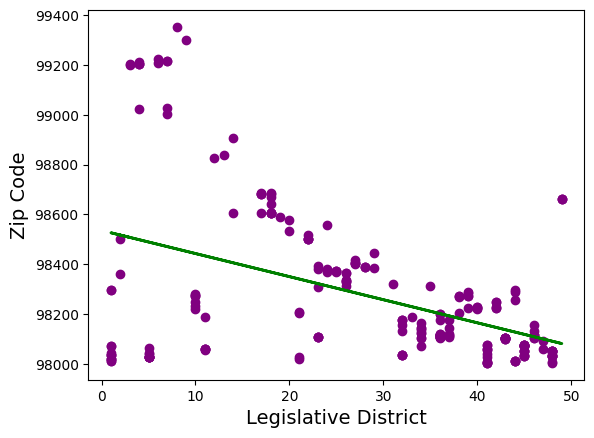

In [32]:
# Store City & Zip code as attributes
eCar = eCar.dropna(subset=['Legislative District', 'Postal Code'])
eCar_sample3 = eCar.sample(n=250)
District = eCar_sample3[['Legislative District']].values.reshape(-1, 1)
Zip = eCar_sample3[['Postal Code']].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(District, Zip)
ZipPredicted = model.predict(District)

# Graph the model
plt.scatter(District, Zip, color='purple')
plt.plot(District, ZipPredicted, color='green', linewidth=2)
plt.xlabel('Legislative District', fontsize=14)
plt.ylabel('Zip Code', fontsize=14)

**Interpretation**

- The data above shows a negative linear regression. The plot is stronger the higher the district number. Given the relationship between zip code and district, it can be predicted that those in certain neighborhoods of Washington own more EV's than other parts of the state.

# **Mutiple Linear Regression**

This section creates a multiple linear regression model using more than two selected attributes from the eCar dataset. It also uses matplotlib to plot the observed values against the predicted values.

**1. Extract Latitude and Longitude from 'Vehicle Location**

This code checks if the Vehicle Location column exists in the dataset and extracts Latitude and Longitude values from it, assuming the format is "POINT (latitude longitude)." This allows us to use these values as individual features in our regression model.

In [33]:
# Assuming 'Vehicle Location' is in the format "POINT (latitude longitude)"
if 'Vehicle Location' in eCar.columns:
    eCar[['Latitude', 'Longitude']] = eCar['Vehicle Location'].str.extract(r'POINT \(([-\d\.]+) ([-\d\.]+)\)').astype(float)

**Interpretation**



*   Separates Latitude and Longitude from Vehicle Location, making them individual features in the dataset.
*   Uses a regular expression to capture the numeric values within parentheses, ensuring they are in a usable format.
*   Creates two new columns, Latitude and Longitude, for further analysis in the model.
*   Enables exploration of the effect of location on electric range by including geographic data as separate predictors.




**2. Define Initial Features and Target**

Now that we have extracted Latitude and Longitude, we define our initial set of features and the target variable. We use Model Year, Latitude, and Longitude as predictors and Electric Range as the target variable.


In [34]:
# Define features and target with multiple attributes
X_multiple = eCar[['Model Year', 'Latitude', 'Longitude']].values
y = eCar['Electric Range'].values.reshape(-1, 1)

**Interpretation**



*   Defines Model Year, Latitude, and Longitude as features to examine their potential impact on Electric Range.
*   Converts these selected features into a matrix format required for model training.
*   Sets Electric Range as the target variable, which the model will attempt to predict.
*   Prepares data for exploring how production year and geographic location may influence the electric range of vehicles.





**3. Encode Categorical Feature 'Model'**

We use label encoding to transform the Model feature into a numeric format suitable for regression analysis.

In [35]:
# Convert all entries in 'Model' to strings
eCar['Model'] = eCar['Model'].astype(str)

# Encode 'Model' using label encoding
label_encoder = LabelEncoder()
eCar['Model_encoded'] = label_encoder.fit_transform(eCar['Model'])

**Interpretation**



*   Converts Model entries to strings to ensure consistent data type for encoding.
*   Applies label encoding to transform each unique vehicle model into a numerical value, making it compatible with the regression model.
*   Adds a new column, Model_encoded, which represents each vehicle model as an integer.
*   Facilitates analysis of the influence of different vehicle models on electric range by making Model a numeric feature.







**4. Define Final Features and Target for Model Training**

After encoding Model, we finalize our features to include Model Year, Latitude, Longitude, and Model_encoded. Electric Range remains as the target variable.

In [36]:
# Define features (Model Year, Latitude, Longitude, Model_encoded) and target (Electric Range)
X = eCar[['Model Year', 'Latitude', 'Longitude', 'Model_encoded']].values
y = eCar['Electric Range'].values.reshape(-1, 1)

**Interpretation**



*   Finalizes the feature set to include Model Year, Latitude, Longitude, and Model_encoded to capture temporal, geographic, and categorical factors.

*   Sets Electric Range as the target variable, which the model will predict based on the selected features.
*   Converts features and target to matrix form, preparing the data structure needed for training the regression model.

*   Combines diverse features, enabling the model to explore how production year, location, and model type together influence electric range.



**5. Train the Linear Regression Model**

In this section, we handle any missing values in the selected features and target variable, define X (features) and y (target), initialize and train the linear regression model.

In [37]:
# Check for missing values in the features and target columns
print("Missing values before handling:")
print(eCar[['Model Year', 'Latitude', 'Longitude', 'Model_encoded', 'Electric Range']].isna().sum())

# Drop rows with any NaN values in the required columns
eCar = eCar.dropna(subset=['Model Year', 'Latitude', 'Longitude', 'Model_encoded', 'Electric Range'])

# Define features and target
X = eCar[['Model Year', 'Latitude', 'Longitude', 'Model_encoded']].values
y = eCar['Electric Range'].values.reshape(-1, 1)

# Initialize and fit the model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Display the model intercept and coefficients
print("Intercept:", lin_model.intercept_[0])
print("Coefficients:", lin_model.coef_)

Missing values before handling:
Model Year        0
Latitude          5
Longitude         5
Model_encoded     0
Electric Range    8
dtype: int64
Intercept: 30095.819463009477
Coefficients: [[-1.48749210e+01 -5.55329265e-03  7.10266215e-01 -1.92212503e-01]]


**Interpretation**


*   Checks for missing values in essential columns to ensure data quality before training.

*   Drops any rows with missing values in Model Year, Latitude, Longitude, Model_encoded, and Electric Range, creating a complete dataset for model accuracy.
*   Initializes and trains the linear regression model with X as features and y as the target, fitting the model to learn relationships within the data.

*   Displays the intercept and coefficients, and calculates the R-squared score to assess how well the model explains variability in Electric Range.


**6. 3D Visualization of Observed vs. Predicted Values**

We create a 3D plot to visualize the sampled observed data points along with the regression plane. This visualization helps us visually assess the fit of the model.

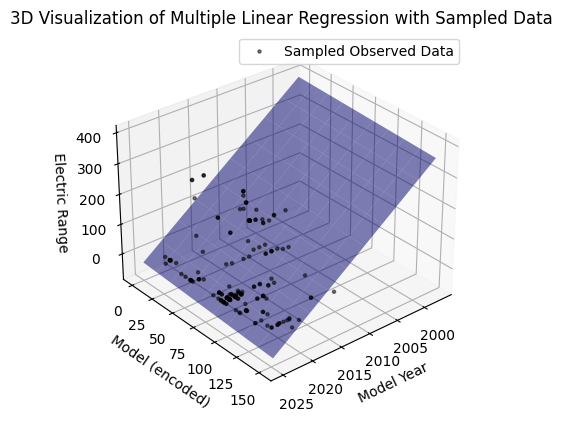

In [38]:
# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Sample a subset of the data for plotting (e.g., 200 points)
sample_size = 200
sample_indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

# Scatter plot of the sampled observed data points with reduced marker size and transparency
ax.scatter3D(X_sample[:, 0], X_sample[:, 3], y_sample, color="black", s=5, alpha=0.5, label="Sampled Observed Data")

# Generate a mesh grid for Model Year and Model_encoded to plot the regression plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 3].min(), X[:, 3].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculate the predicted Electric Range for each point on the mesh grid
y_pred_mesh = (
    lin_model.intercept_[0]
    + lin_model.coef_[0][0] * x1_mesh
    + lin_model.coef_[0][3] * x2_mesh
)

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, color='blue', alpha=0.5)

# Label the axes
ax.set_xlabel('Model Year')
ax.set_ylabel('Model (encoded)')
ax.set_zlabel('Electric Range')

# Set the view angle
ax.view_init(30, 50)
plt.title("3D Visualization of Multiple Linear Regression with Sampled Data")
plt.legend()
plt.show()

**Interpretation**

*   Sets up a 3D plot to visualize the relationship between Model Year, Model_encoded, and Electric Range, helping illustrate the model’s predictions in three-dimensional space.

*   Generates a regression plane using a mesh grid, based on the model’s intercept and coefficients, to show predicted Electric Range values.

*   Provides a visual comparison between observed data points and the regression plane, allowing assessment of the model’s fit and alignment with actual data.


# **Logistic Regression**

This section creates a logistic regression model using some selected attributes from the eCar dataset. It also uses matplotlib to plot the observed values against the predicted values.

1. The code cleans the eCar dataframe by removing rows with missing values, filtering out BEVs with low electric ranges, converting the Electric Vehicle Type to numerical values, and selecting a random sample of 250 rows to quickly show the changes made in the previous steps. These steps make the data cleaner and easier to work with for further analysis.

In [39]:
eCar = eCar.dropna(subset=['Electric Vehicle Type', 'Electric Range'])
eCar = eCar[~((eCar['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (eCar['Electric Range'] < 90))]

eCar.loc[eCar['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)', 'Electric Vehicle Type'] = 1
eCar.loc[eCar['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Vehicle Type'] = 0

eCar_sample = eCar.sample(n=250)
eCar

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Latitude,Longitude,Model_encoded
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,0,Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10,-122.872833,47.579830,115
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,1,Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10,-122.696120,47.575958,85
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,1,Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.334080,47.609932,87
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,1,Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10,-122.571576,46.909580,20
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,98036.0,2020,TESLA,MODEL Y,1,Clean Alternative Fuel Vehicle Eligible,291.0,0.0,21.0,124511187,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,5.306105e+10,-122.287143,47.812199,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205426,KNDCE3LG9L,Snohomish,Marysville,WA,98270.0,2020,KIA,NIRO,1,Clean Alternative Fuel Vehicle Eligible,239.0,0.0,38.0,172207248,POINT (-122.1515174 48.0650751),PUGET SOUND ENERGY INC,5.306105e+10,-122.151517,48.065075,93
205431,5YJ3E1EA4L,Snohomish,Marysville,WA,98270.0,2020,TESLA,MODEL 3,1,Clean Alternative Fuel Vehicle Eligible,266.0,0.0,38.0,127376686,POINT (-122.1515174 48.0650751),PUGET SOUND ENERGY INC,5.306105e+10,-122.151517,48.065075,87
205433,WA1E2AFY9P,Clark,Vancouver,WA,98664.0,2023,AUDI,Q5 E,0,Not eligible due to low battery range,23.0,0.0,49.0,240695682,POINT (-122.575383 45.620105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,-122.575383,45.620105,107
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,1,Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10,-117.583610,47.495131,89


**Interpretation**
- The eCar dataset now has improved quality since missing values have been removed, and low-range BEVs, which could have skewed the results, have been filtered out. By removing BEVs with less than 90 miles of range, the dataset now focuses on more practical electric vehicles that are likely more relevant to most users.

2. The code below stores relevant columns as variables.

In [40]:
X = eCar[['Electric Range']].values.reshape(-1, 1)
y = eCar[['Electric Vehicle Type']].values.reshape(-1, 1).astype(int)

**Interpretation**
- X represents the Electric Range of the vehicles, and y represents the Electric Vehicle Type, either 0 or 1. Both are reshaped to the appropriate format for further analysis or modeling.

3. This code trains a logistic regression model to predict whether a vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV) based on the Electric Range, and it displays the result using a plot.

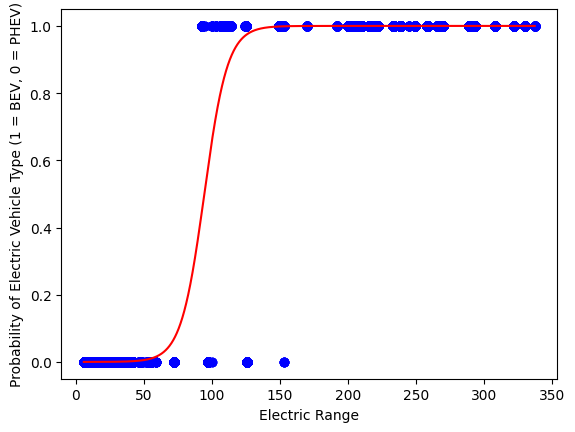

In [41]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

plt.scatter(X, y, color = 'blue')
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1]
plt.plot(xDelta, yDeltaProb, color = 'red')
plt.xlabel('Electric Range')
plt.ylabel('Probability of Electric Vehicle Type (1 = BEV, 0 = PHEV)')
plt.show()

**Interpretation**
- It visualizes the actual data points and the predicted probabilities, showing how the likelihood of a vehicle being a BEV changes with increasing range.
- It effectively shows that vehicles with longer electric ranges are more likely to be BEVs, whereas shorter-range vehicles are more likely to be PHEVs.

# Conclusion

Our analyses provide valuable insights into patterns of electric vehicle (EV) ownership and characteristics within Washington State. The linear regression analysis reveals a linear negative relationship between zip codes or districts and EV ownership. Specifically, neighborhoods with higher district numbers tend to have more EV owners. This suggests that certain areas—possibly those with higher income levels, better access to charging stations, or greater environmental awareness—are more inclined to adopt EVs.

The multiple linear regression, visualized with a 3D plot, shows a clear relationship between a vehicle's model year, its specific model (encoded numerically), and its electric range. The regression plane indicates that newer vehicle models and certain specific models are associated with longer electric ranges. This finding highlights technological advancements over time and consumer preferences for models that offer extended range capabilities.

The logistic regression analysis effectively distinguishes between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) based on electric range. The visualization demonstrates that as the electric range increases, the probability of a vehicle being a BEV also increases. Conversely, vehicles with shorter electric ranges are more likely to be PHEVs. This underscores electric range as a significant predictor of the type of EV.